<a href="https://colab.research.google.com/github/mqquiroz/ICH3424/blob/master/Plane_Beach_Refdif_prueba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mqquiroz/Refdif1.git
%cd Refdif1/
!make all
%cd ..
!mkdir modelo_REFDIF
%cd Refdif1/
%cp -r 'datgen' 'refdif1' 'surface' '/content/modelo_REFDIF'
%cd ..
!rm -r Refdif1
%cd modelo_REFDIF
!chmod +x datgen refdif1 surface
#!chmod +rx ./datgen ./refdif1 ./surface
import os
cwd = os.getcwd()
os.environ['PATH'] += ":"+cwd
%cd ..

Cloning into 'Refdif1'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 121.41 KiB | 978.00 KiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/Refdif1
gfortran -std=legacy -c -O refdif1v25.f
refdif1v25.f:635:72:

  635 |      &(j)+dir(ifreq,i+1)))*2.
      |                                                                        ^
refdif1v25.f:633:13:

  633 |       do 6 i=1,nn
      |             ^
note: within this loop
refdif1v25.f:629:72:

  629 |       dir(ifreq,ip1)=2.*pi*seed/100.
      |                                                                        ^
refdif1v25.f:626:13:

  626 |       do 5 i=1,nn
      |             ^
note: within this loop
refdif1v25.f:624:72:

  624 |      &p)+cos(thi(i)-dth/2.)**(2*nsp))
      |                                                            

In [2]:
!datgen

 ***********  parabolic model in rectangular grid  **********

 input type of bottom desired

 1=surface piercing island
 2=bbr, submerged shoal
 3=arthur rip current
 4=test case, planar bottom
 5=radder(1979), configuration 2
 6=grazing incidence on linear caustic
 7=whalin's channel
 8=surface piercing breakwater
 9=channel
10=breakwater
4
  input m,n,dx,dy,depth,period
100,100,5,5,10,8
  input bottom slope
0.02
  do you want to create indat.dat? yes=1
1
  input iu: 1=mks, 2=english
1
  input dispersion relationship; ntype: 0=linear,
                           1=composite, 2=stokes
0
  input lateral boundary condition; ibc: 0=closed
                                         1=open
1
 input ispace (0=program picks x spacing, 1=user choses)
0
  input nd (# y divisions, 1 is minimum)
1
 input if(1) turbulent, if(2) porous, if(3) laminar
   standard  choice:  1, 0, 0
0,0,0
 input isp (subgrid features) :standard  0
0
 input values of iinput, ioutput:
 iinput: 1 standard, i.e., not starti

In [3]:
import numpy as np
import matplotlib.pyplot as plt

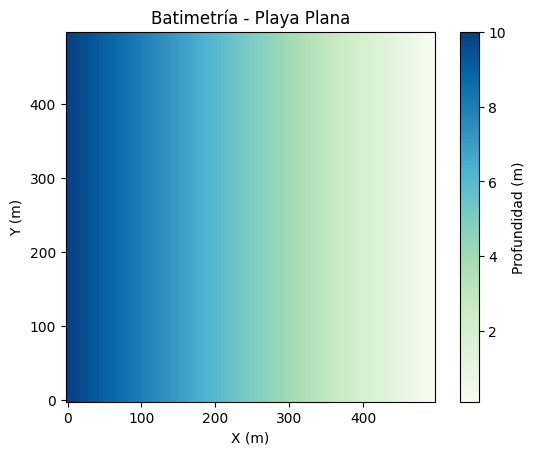

In [4]:
Grilla = np.genfromtxt('refdat.dat')#,filling_values=np.nan)
np.shape(Grilla)

mr = 100
nr = 100

DXR = 5.0
DYR = 5.0

xpp = np.zeros(mr)
ypp = np.zeros(nr)
for i in range(mr):
  xpp[i] = i*DXR
for i in range(nr):
  ypp[i] = i*DYR

X,Y = np.meshgrid(xpp,ypp)

Depth = Grilla.reshape(100,100)

plt.pcolormesh(X,Y,Depth.T,cmap='GnBu')
cbar = plt.colorbar()
cbar.set_label('Profundidad (m)')
plt.gca().set_aspect('equal')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Batimetría - Playa Plana')
plt.show()

In [5]:
!refdif1

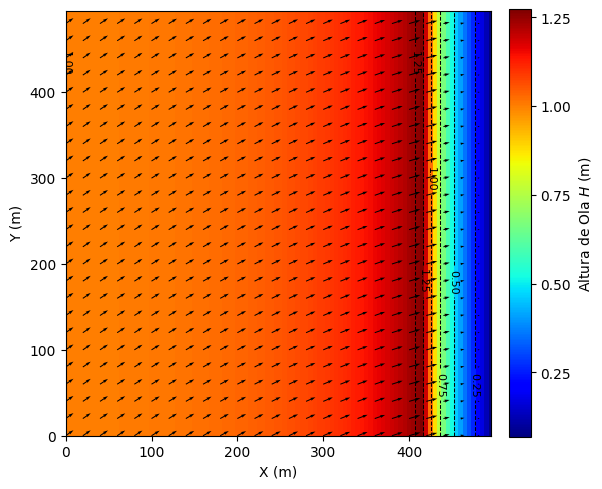

In [6]:
h     = np.loadtxt('depth.dat')
H     = np.loadtxt('height.dat')
angle = np.loadtxt('angle.dat')
nx,ny = np.shape(h)

x = DXR*np.arange(1,nx+1)-DXR
y = DYR*np.arange(1,ny+1)-DYR

X,Y = np.meshgrid(x,y)

DX = H*np.cos(np.pi*angle/180)
DY = H*np.sin(np.pi*angle/180)

nd = 4

alto  = 6
ancho = 6
fig = plt.figure(figsize=(ancho, alto))

plt.pcolormesh(X,Y,H.T,cmap='jet')

cbar = plt.colorbar(ticks=np.arange(0, np.max(H)+0.25, 0.25),fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('Altura de Ola $H$ (m)',fontsize=10)

CS = plt.contour(X,Y,H.T,levels=[0.25,0.5,0.75,1.0,1.25],colors='k',linewidths=0.75,linestyles='dashed')
plt.clabel(CS, CS.levels, inline=True, fontsize=8)


plt.quiver(X[::nd,::nd],Y[::nd,::nd],DX.T[::nd,::nd],DY.T[::nd,::nd])
plt.gca().set_aspect('equal')
plt.xlim(np.min(x),np.max(x))
plt.ylim(np.min(y),np.max(y))
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()

In [9]:
print(angle)

[[35.     35.     35.     ... 35.     35.     35.    ]
 [34.7709 34.7709 34.7709 ... 34.7709 34.7709 34.7709]
 [34.6176 34.6176 34.6176 ... 34.6175 34.6175 34.6175]
 ...
 [ 6.3589  6.3589  6.3589 ...  6.3589  6.3589  6.3589]
 [ 5.1941  5.1941  5.1941 ...  5.1941  5.1941  5.1941]
 [ 3.6744  3.6744  3.6744 ...  3.6744  3.6745  3.6745]]


In [10]:
!surface

 enter output file name in single quotes
'eta.dat'
  number of y points =          100
  maximum y =    495.000000    
  number of x points in file =          101
  maximum x =    495.000000    
  grid spacing (x and y) in new image =    5.00000000    
  number of x points in interpolated image =          100


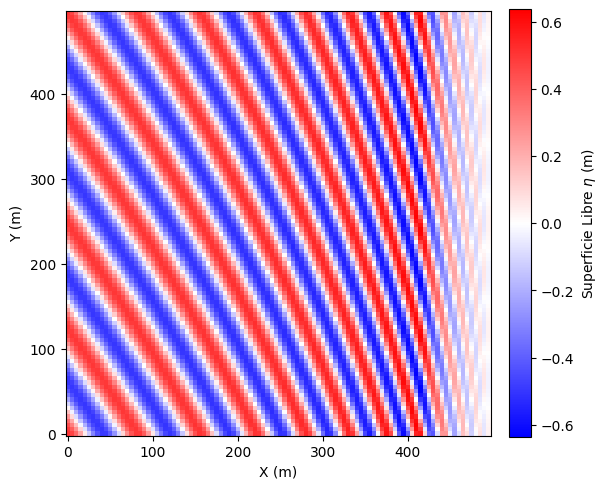

In [11]:
eta = np.loadtxt('eta.dat')
etac = np.fliplr(eta)

alto  = 6
ancho = 6
fig = plt.figure(figsize=(ancho, alto))

plt.pcolormesh(X,Y,etac.T,cmap='bwr')
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('Superficie Libre $\eta$ (m)',fontsize=10)
plt.gca().set_aspect('equal')
#plt.xlim(0,495)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()

In [54]:
def dispersion(h,T,tol=1e-4):
  g = 9.81 #gravedad (m/s2)
  delta_c = 0.0001
  f = 1/T
  C = np.sqrt(g*h)
  while True:
    k = 2*np.pi*f/C
    C = np.sqrt(g/k*np.tanh(k*h))
    if delta_c*k/(2*np.pi*f) <= tol:
      break
  return C

dispersion(0.1025,8)

np.float64(1.0016837293998773)

In [63]:
h[99,:]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [68]:
#@np.vectorize
#def disper(T,h,delta_c=0.00001,tol=1e-7):
#  #constante
#  g = 9.81 #m/s2
#  f = 1/T
#  C = np.sqrt(g*h)
#  for i in range(50):
#    k = 2*np.pi*f/C
#    C = np.sqrt((g/k)*np.tanh(k*h))
#    if delta_c*k/(2*np.pi*f) <= tol:
#      break
#  return C

#Función para resolver la ecuación de dispersión, con entrada de h (profundidad) y T (periodo). Resultado: Celeridad
# @np.vectorize
def dispersion(h,T,tol=1e-4):
  g = 9.81 #gravedad (m/s2)
  delta_c = 0.0001
  f = 1/T
  C = np.sqrt(g*h)
  while True:
    k = 2*np.pi*f/C
    C = np.sqrt(g/k*np.tanh(k*h))
    if delta_c*k/(2*np.pi*f) <= tol:
      break
  return C

T = 8
w = 2*np.pi/T

C = np.zeros((nx,ny))
h[99,:] = 0.1025

for i in range(nx):
  for j in range(ny):
    C[i,j] = dispersion(h[i,j],T)

k = w/C
L = 2*np.pi/k
print(np.shape(k))
print(L)

(100, 100)
[[72.29318083 72.29318083 72.29318083 ... 72.29318083 72.29318083
  72.29318083]
 [71.98882476 71.98882476 71.98882476 ... 71.98882476 71.98882476
  71.98882476]
 [71.68223051 71.68223051 71.68223051 ... 71.68223051 71.68223051
  71.68223051]
 ...
 [13.68124689 13.68124689 13.68124689 ... 13.68124689 13.68124689
  13.68124689]
 [11.18231888 11.18231888 11.18231888 ... 11.18231888 11.18231888
  11.18231888]
 [ 8.01346984  8.01346984  8.01346984 ...  8.01346984  8.01346984
   8.01346984]]


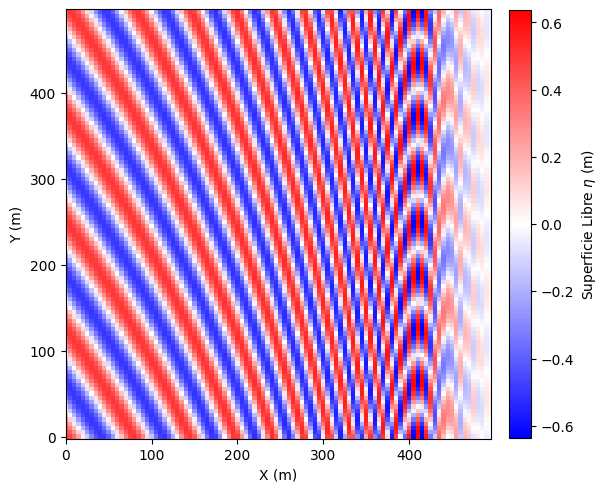

In [91]:
wave = (H.T/2)*np.cos((k.T*np.cos(np.pi*angle.T/180)*X) + (k.T*np.sin(np.pi*angle.T/180)*Y) - (w*0.0) )

#wave = (etac.T)*np.cos((k*np.cos(np.pi*angle/180)*X.T) + (k*np.sin(np.pi*angle/180)*Y.T) - (w*0.0) )

alto  = 6
ancho = 6
fig = plt.figure(figsize=(ancho, alto))

plt.pcolormesh(X,Y,wave,cmap='bwr')
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('Superficie Libre $\eta$ (m)',fontsize=10)
plt.gca().set_aspect('equal')
plt.xlim(0,495)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()

In [92]:
from IPython.display import HTML
from matplotlib import animation

In [93]:
##xxx = np.loadtxt('outdat.dat',skiprows=3).view(complex)
list=[]
with open('outdat.dat') as data:
    for line in data:
      line = line.rstrip('\n')
      list.append(line)

ii = np.arange(3,203,2)
phi = np.zeros((100,100), dtype=complex)
fase = np.zeros((100,100))

for i in range(len(ii)):
  listoco =list[ii[i]].split(" ")
  listoco[:] = [x for x in listoco if x]
  listoco[:] = [x.strip('()') for x in listoco]
  listoco[:] = [x.split(',') for x in listoco]
  prefase    = [np.arctan2(float(x[1]), float(x[0])) for x in listoco]
  listoco[:] = [complex(float(x[0]),float(x[1])) for x in listoco]
  fase[:,i]  = prefase
  #listoco[:] = [float(i) for i in listoco]
  phi[:,i]  = listoco
  #print(listoco)

In [94]:
#fases 2
list=[]
with open('outdat.dat') as data:
    for line in data:
      line = line.rstrip('\n')
      list.append(line)

ii = np.arange(2,200+2,2)
fases = np.zeros((100,100))

for i in range(len(ii)):
  #print(list[ii[i]])
  listoco =list[ii[i]].split(" ")
  listoco[:] = [x for x in listoco if x]
  #listoco[:] = [x[1] for x in listoco]
  #listoco[:] = [x.split(',') for x in listoco]
  #prefase    = [np.arctan2(float(x[1]), float(x[0])) for x in listoco]
  #listoco[:] = [complex(float(x[0]),float(x[1])) for x in listoco]
  fases[i,:]  = listoco[1]
  #listoco[:] = [float(i) for i in listoco]
  #phi[:,i]  = listoco

print(fases.T)

[[ 0.          0.44407958  0.88988471 ... 68.5645752  71.117981
  74.4344635 ]
 [ 0.          0.44407958  0.88988471 ... 68.5645752  71.117981
  74.4344635 ]
 [ 0.          0.44407958  0.88988471 ... 68.5645752  71.117981
  74.4344635 ]
 ...
 [ 0.          0.44407958  0.88988471 ... 68.5645752  71.117981
  74.4344635 ]
 [ 0.          0.44407958  0.88988471 ... 68.5645752  71.117981
  74.4344635 ]
 [ 0.          0.44407958  0.88988471 ... 68.5645752  71.117981
  74.4344635 ]]


In [95]:
list=[]
with open('surface.dat') as data:
    for line in data:
      line = line.rstrip('\n')
      list.append(line)

ii = np.arange(3,203+2,2)

surf = np.zeros((100,100))

for i in range(len(ii)-1):
  listoco =list[ii[i]].split(" ")
  listoco[:] = [x for x in listoco if x]
  listoco[:] = [float(i) for i in listoco]
  surf[:,i]  = listoco
  #print(listoco)

In [96]:
#calculos de kx y ky

kx = np.zeros((100,100))
ky = np.zeros((100,100))

for i in range(100-1):
  for j in range(100-1):
    kx[i,j] = (phase[i+1,j]-phase[i,j])/5
    ky[i,j] = (phase[i,j+1]-phase[i,j])/5

kx[:,0]

NameError: name 'phase' is not defined

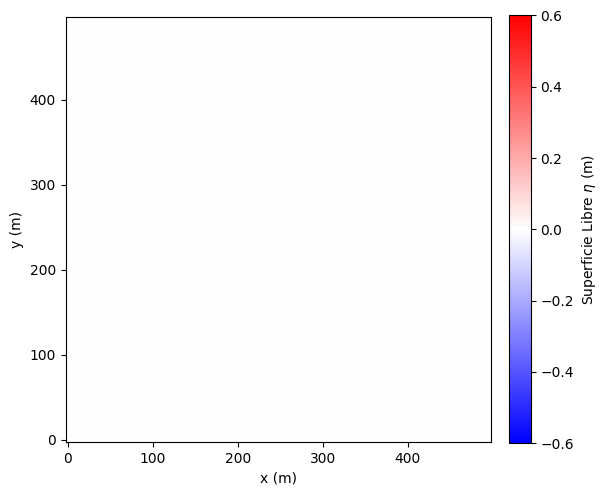

In [97]:
#Creamos el grafico
alto  = 6
ancho = 6

fig1, ax = plt.subplots(figsize=(ancho,alto))
ax.set_aspect('equal')

#Definir cosas que no se mueven
ax.set_xlabel('x (m)',fontsize=10)
ax.set_ylabel('y (m)',fontsize=10)
#ax.set_xlim(0,4*L)
#ax.set_ylim(0,100)

quad = ax.pcolormesh(X,Y,np.zeros(np.shape(X)),cmap='bwr', vmin=-0.6, vmax = 0.6)

cbar = fig1.colorbar(quad,fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('Superficie Libre $\eta$ (m)',fontsize=10)

time_text = ax.set_title('',fontsize=10)


In [120]:
t_total = 10

#*np.exp(1j*fase.T) *np.exp(1j*fase)

H_ola = 2*np.abs(phi)
amp   = np.abs(phi)
phase = np.angle(phi) #np.flipud(np.abs(phi))

def animate_0(t):
  #eta_anim = np.real(etac.T*np.exp(1j*np.flipud(np.angle(phi.T)))*np.exp(-1j*w*t))
  #eta_anim = np.real(phi*np.exp(-1j*fase*t)) #etac.T*np.exp(1j*np.flipud(np.angle(phi.T)))*np.exp(-1j*w*t))
  #eta_anim = np.real(etac.T*np.exp(1j*np.flipud(fases))*np.exp(-1j*w*t))
  #eta_anim = np.real(amp.T*np.exp(1j*( (k*np.cos(np.pi*angle/180)*X.T) + (k*np.sin(np.pi*angle/180)*Y.T)- w*t )))
  eta_anim = np.real(etac.T*np.exp(1j*fase.T)*np.exp(-1j*w*t)) #np.fliplr(phi.T) # np.flipud(np.fliplr(fase)) #np.abs(phi)
  #eta_anim = np.real(etac.T*np.exp(1j*fases)*np.exp(-1j*w*t))
  #eta_anim = (H/2)*np.cos((k*np.cos(np.pi*angle/180)*X.T) + (k*np.sin(np.pi*angle/180)*Y.T) - (w*t) )
  #eta_anim = eta_anim.T
  time_text.set_text('Tiempo = %0.1f s' % (t,))
  quad.set_array(eta_anim.ravel())
  return quad, time_text

anim = animation.FuncAnimation(fig1, animate_0, frames= t_total, interval=200, blit=True)

HTML(anim.to_jshtml())

In [ ]:
np.sum(phase,1)

array([ 28.9152642 ,  22.92165541,  23.21123185,  17.21762476,
        11.2240126 ,  -1.05278732, -13.32959479, -25.60640653,
       -56.73277545, -87.85914709, -62.43684913, -37.0145357 ,
       -11.59222314,  -5.01945881,   1.55330098,   8.12605733,
         8.41562888,  14.9883781 ,  15.27794248,  21.85069553,
        22.14025932,  22.4298281 ,  29.00258145,  29.29214885,
        29.58171784,  23.58810234,  23.87767449,  17.88406013,
        11.89044423,   5.89683378,  -0.0967811 , -12.37358209,
       -37.21675138, -68.34310794, -80.61991213, -55.19760385,
       -29.77529941,  -4.35299758,  -4.0634332 ,   2.50931879,
         9.08207431,   9.37164488,  15.94440862,  16.23398391,
        22.80675013,  23.0963283 ,  23.3859049 ,  23.67547956,
        30.24823435,  24.25461582,  24.5441791 ,  24.8337427 ,
        18.84012462,  12.84651312,   6.85290396,  -5.42388787,
       -17.70068319, -42.5438542 , -86.23658562, -73.38065324,
       -47.95835149, -22.53604781,  -3.39692749,   3.17

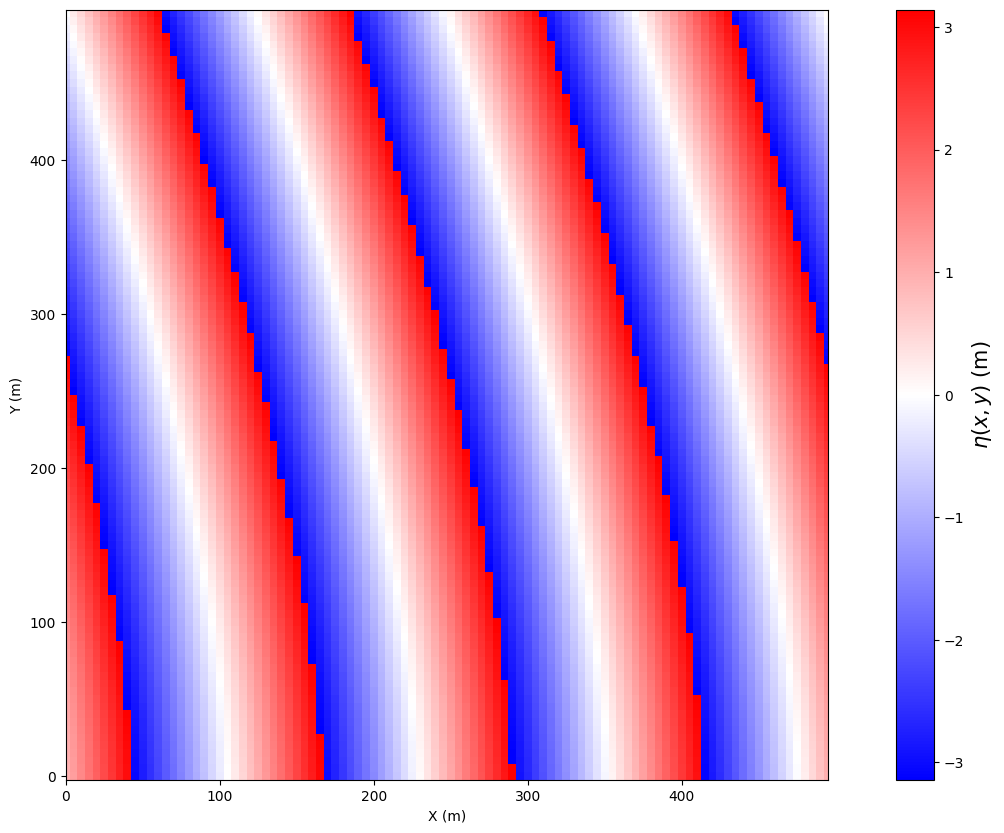

In [ ]:
alto  = 10
ancho = 17.5
fig = plt.figure(figsize=(ancho, alto))

#plt.pcolormesh(X,Y,surf,cmap='bwr')
plt.pcolormesh(X,Y,np.flipud(np.angle(phi.T)),cmap='bwr')
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\eta (x,y)$ (m)',fontsize=15)
plt.gca().set_aspect('equal')
plt.xlim(0,495)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()